## Yoav Ellinson, ID 206036949

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## 1. Plot a simple example in 2D for which calculating the SVD of X is not equivalent to calculating the Principal components of X. Explain.

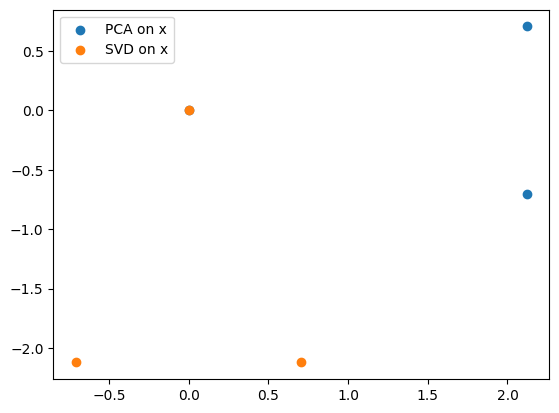

In [78]:
#lets take the example from the dry HW.
x = np.array([[1,2,0],[2,1,0],[0,0,0]])

def pca(x,reduced_dim=2):
    #returns the pca components of for the wanted reduced dim
    x_centered = x -np.mean(x,0)
    cov_x = 1/(x_centered.shape[0]-1) * x_centered.T @ x_centered
    eig_vals,eig_vecs = np.linalg.eigh(cov_x)
    eig_vecs = eig_vecs[:,np.argsort(-eig_vals)]
    return eig_vecs[:,:reduced_dim]
#pca on x
x_2d_pca = x@pca(x,2)

#svd on x:
U,S,V=np.linalg.svd(x)
svd_x = V[:,:-1]
x_2d_svd = x@svd_x

plt.figure()
plt.scatter(x_2d_pca[:,0],x_2d_pca[:,1],label='PCA on x')
plt.scatter(x_2d_svd[:,0],x_2d_svd[:,1],label='SVD on x')
plt.legend()
plt.show()

We can see that the PCA and SVD does not converge here.

## 2. Use the two leading principle components to project a 1000 sample of the digit ’1’ into a two-dimensional space. Use a scatter plot to show the result

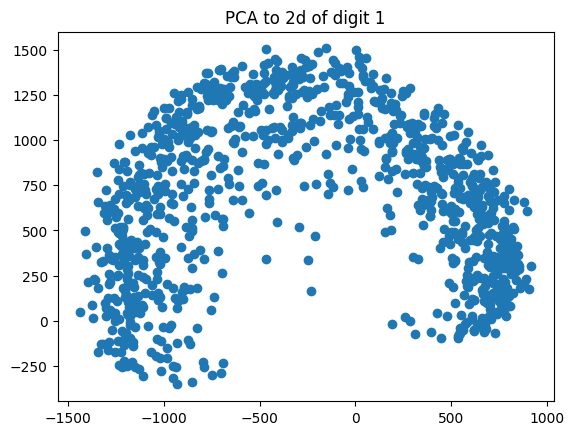

In [81]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.mnist.load_data()
N = 1000
ones = x_train[y_train==1][:1000].reshape(N,-1) # first 1000 samples of the digit 1
ones_2d = ones@pca(ones)
plt.figure()
plt.scatter(ones_2d[:,0],ones_2d[:,1],label='ones')
plt.title('PCA to 2d of digit 1')
plt.show()

## 3. Use the two leading principle components to project a 1000 samples of the digit ’0’. Use ascatter plot to show the result

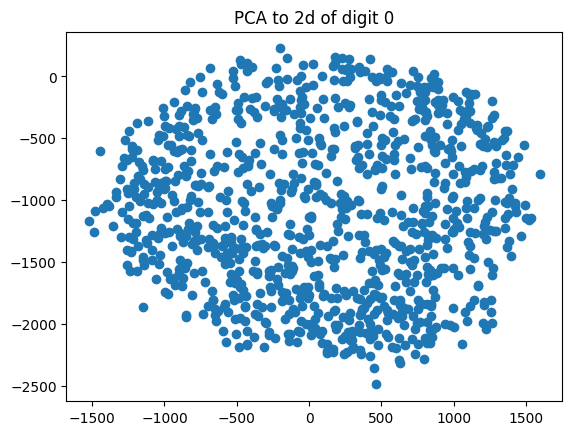

In [86]:
N = 1000
zeros = x_train[y_train==0][:1000].reshape(N,-1) # first 1000 samples of the digit 1
zeros_2d = zeros@pca(zeros)
plt.figure()
plt.scatter(zeros_2d[:,0],zeros_2d[:,1],label='zeros')
plt.title('PCA to 2d of digit 0')
plt.show()

## 4. Use the two leading principle components to project a 2000 combined samples from the last two sections. Use a scatter plot to show the result, with color to indicate the sample label.

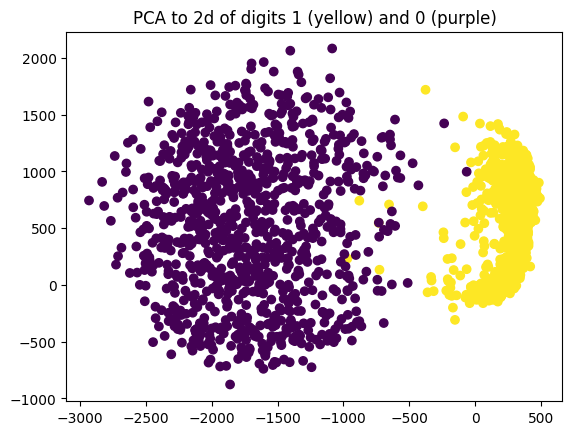

In [92]:
combined = np.concatenate((ones,zeros))
labels = np.concatenate((np.ones(N),np.zeros(N)))
combined_2d = combined @ pca(combined)
plt.figure()
plt.scatter(combined_2d[:,0],combined_2d[:,1],c =labels)
plt.title('PCA to 2d of digits 1 (yellow) and 0 (purple)')
plt.show()

## 5. How many components are required to capture 90% of the variance of the datasets from the last three sections?

The total varience is the sum of the eigenvalues of the coveriance amtrix of the data. therfore to find how mand eigenvalues we need to explain 90% of the varience we need to sum eigenvaluse untill we reach 90% of the sum of all the eigenvalues.

In [99]:
def varience_precentage(x,p=0.9):
    x_centered = x -np.mean(x,0)
    cov_x = 1/(x_centered.shape[0]-1) * x_centered.T @ x_centered
    eig_vals,eig_vecs = np.linalg.eigh(cov_x)
    eig_vecs = eig_vecs[:,np.argsort(-eig_vals)]
    eig_vals = eig_vals[np.argsort(-eig_vals)]
    total_var = np.sum(eig_vals)
    s = 1
    partial_var = 0
    while partial_var < p*total_var:
        partial_var = np.sum(eig_vals[:s])
        s+=1
    return s

# ones only
comp_ones = varience_precentage(ones)

#zeros only 
comp_zeros = varience_precentage(zeros)

#combined 
comp_combined = varience_precentage(combined)

print(f'For each dataset we need the following number of PCA componets the explain 90% of the varience:\nThe digit 1: {comp_ones}\nThe digit 0: {comp_zeros}\nThe digits 0 and 1 {comp_combined}')



For each dataset we need the following number of PCA componets the explain 90% of the varience:
The digit 1: 35
The digit 0: 58
The digits 0 and 1 47


# COIL20
## I chose the object 13


## 6. Embed the selected object into a two-dimensional space using Diffusion Maps- show the results for several values of σ. What is considered a good value for σ in this example?

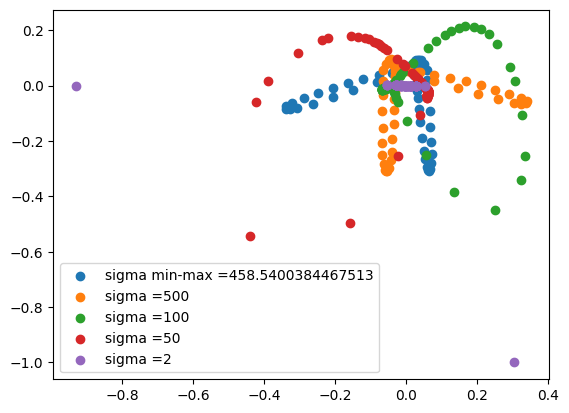

In [163]:
from scipy.spatial import distance_matrix
from scipy.sparse.linalg import eigs
import glob
import PIL.Image
data_path = './coil-20/coil-20-proc/'
obj13_paths = glob.glob(data_path+'obj13*')
obj13 = np.array([np.array(PIL.Image.open(path)) for path in obj13_paths])
obj13 = obj13.reshape(obj13.shape[0],-1)/obj13.max()
dis =distance_matrix(obj13,obj13)
sigma = sigma=1*np.sort(dis**2,axis=1)[:,1].max() #using the min max method
W = np.exp(-dis**2/sigma)
D = np.eye(dis.shape[0])*np.sum(W,0)
P = np.linalg.inv(D)@W
eig_vals,eig_vecs = eigs(P,k=3)
eig_vals ,eig_vecs= np.real(eig_vals[np.argsort(-eig_vals)]),np.real(eig_vecs[:,np.argsort(-eig_vals)])
plt.figure()
plt.scatter(eig_vecs[:,1],eig_vecs[:,2],label=f'sigma min-max ={sigma}')
for sig in [500,100,50,2]:
    W = np.exp(-dis**2/sig)
    D = np.eye(dis.shape[0])*np.sum(W,0)
    P = np.linalg.inv(D)@W
    eig_vals,eig_vecs = eigs(P,k=3)
    eig_vals ,eig_vecs= np.real(eig_vals[np.argsort(-eig_vals)]),np.real(eig_vecs[:,np.argsort(-eig_vals)])
    plt.scatter(eig_vecs[:,1],eig_vecs[:,2],label=f'sigma ={sig}')
plt.legend()
plt.show()

in this example a good sigma is between 100 and 50 (more around 50), where the angle of the picture is on a nice manifold.


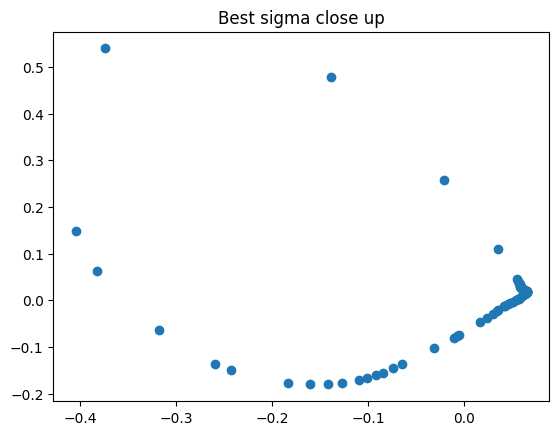

In [169]:
sigma=55
W = np.exp(-dis**2/sigma)
D = np.eye(dis.shape[0])*np.sum(W,0)
P = np.linalg.inv(D)@W
eig_vals,eig_vecs = eigs(P,k=3)
eig_vals ,eig_vecs= np.real(eig_vals[np.argsort(-eig_vals)]),np.real(eig_vecs[:,np.argsort(-eig_vals)])
plt.figure()
plt.scatter(eig_vecs[:,1],eig_vecs[:,2],label=f'sigma ={sigma}')
plt.title('Best sigma close up')
plt.show()

## 7. Use TSN-E to embed all objects from COIL20. Run the algorithm twice and compare the results. Are they identical? How can you stabilize the results?

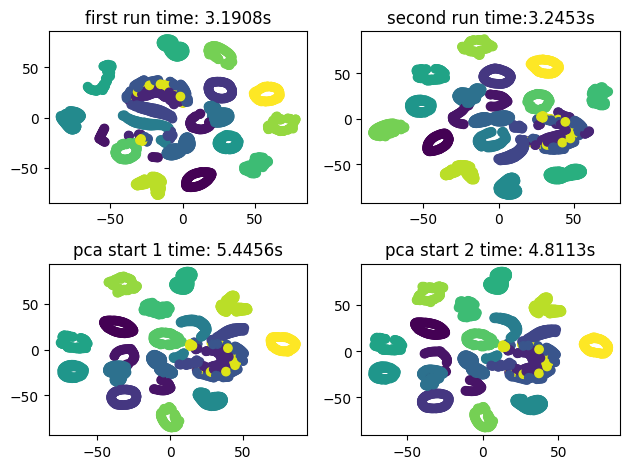

In [206]:
from sklearn.manifold import TSNE
import time
data_path = './coil-20/coil-20-proc/'
all_obj_paths = glob.glob(data_path+'*.png')
all_obj = np.array([np.array(PIL.Image.open(path)) for path in all_obj_paths])
all_obj = all_obj.reshape(all_obj.shape[0],-1)/obj13.max()
all_labels = np.array([int(path.split('obj')[-1].split('__')[0]) for path in all_obj_paths])
start = time.time()
all_embedded_1 = TSNE(n_components=2,learning_rate='auto',init='random',perplexity=10).fit_transform(all_obj)
end1 = time.time()
all_embedded_2 = TSNE(n_components=2,learning_rate='auto',init='random',perplexity=10).fit_transform(all_obj)
end2 = time.time()
all_embedded_3 = TSNE(n_components=2,learning_rate='auto',init='pca',perplexity=10).fit_transform(all_obj)
end3 = time.time()
all_embedded_4 = TSNE(n_components=2,learning_rate='auto',init='pca',perplexity=10).fit_transform(all_obj)
end4 = time.time()

fig,axs = plt.subplots(2,2)
axs[0,0].scatter(all_embedded_1[:,0],all_embedded_1[:,1],c=all_labels)
axs[0,1].scatter(all_embedded_2[:,0],all_embedded_2[:,1],c=all_labels)
axs[1,0].scatter(all_embedded_3[:,0],all_embedded_3[:,1],c=all_labels)
axs[1,1].scatter(all_embedded_4[:,0],all_embedded_4[:,1],c=all_labels)

axs[0,0].set_title(f'first run time: {round(end1-start,4)}s')
axs[0,1].set_title(f'second run time:{round(end2-end1,4)}s')
axs[1,0].set_title(f'pca start 1 time: {round(end3-end2,4)}s')
axs[1,1].set_title(f'pca start 2 time: {round(end4-end3,4)}s')
fig.tight_layout()
plt.show()

We can see that when starting randomly the result is not consistant, but when starting from PCA we get a similar result each time.

## 8. Compare the results from the previous section to UMAP. Both in terms of run time and representation quality

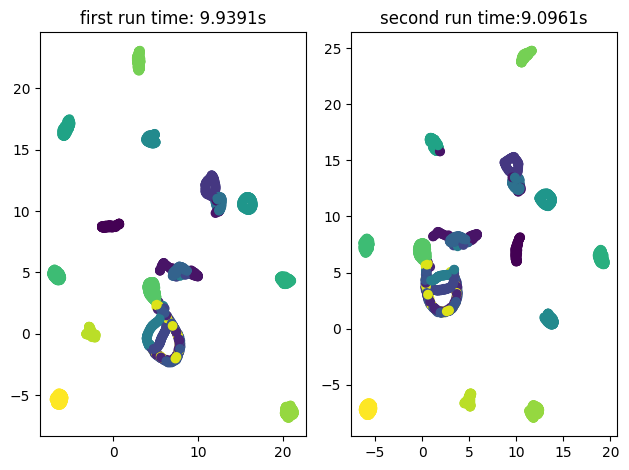

In [218]:
import umap.umap_ as umap

umap_embedder = umap.UMAP(n_neighbors=20, n_components=2)

start = time.time()
all_embedded_umap_1 = umap_embedder.fit_transform(all_obj)
end1 = time.time()
all_embedded_umap_2 = umap_embedder.fit_transform(all_obj)
end2 = time.time()
all_embedded_umap_3 = umap_embedder.fit_transform(all_obj)
end3 = time.time()
all_embedded_umap_4 = umap_embedder.fit_transform(all_obj)
end4 = time.time()

fig,axs = plt.subplots(1,2)
axs[0].scatter(all_embedded_umap_1[:,0],all_embedded_umap_1[:,1],c=all_labels)
axs[1].scatter(all_embedded_umap_2[:,0],all_embedded_umap_2[:,1],c=all_labels)
axs[0].set_title(f'first run time: {round(end1-start,4)}s')
axs[1].set_title(f'second run time:{round(end2-end1,4)}s')

fig.tight_layout()
plt.show()

We can see that TSNE is much faster then (even more when not using pca start). but umap seems to do better in separating the classes. both had hard time with all 20 classes.